In [ ]:
!pip -q install google-generativeai==0.3.0
!pip -q install google-ai-generativelanguage==0.4.0

# Gemini Pro Basics

1. Model setup
2. Generation
3. Streaming
4. Safety Settings
5. Using the Chat Model
6. Images with Gemini Pro Vision
7. VQA with Gemini Pro Vision

In [ ]:
import google.generativeai as genai
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

GOOGLE_AI_STUDIO = userdata.get('GOOGLE_AI_STUDIO2')

genai.configure(api_key=GOOGLE_AI_STUDIO)

In [ ]:
for m in genai.list_models():
    print(m.name)
    print(m.supported_generation_methods)

models/chat-bison-001
['generateMessage', 'countMessageTokens']
models/text-bison-001
['generateText', 'countTextTokens', 'createTunedTextModel']
models/embedding-gecko-001
['embedText', 'countTextTokens']
models/gemini-pro
['generateContent', 'countTokens']
models/gemini-pro-vision
['generateContent', 'countTokens']
models/embedding-001
['embedContent', 'countTextTokens']
models/aqa
['generateAnswer']


In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
%%time
response = model.generate_content("Tell me about the biggest planet?")

CPU times: user 137 ms, sys: 21.2 ms, total: 158 ms
Wall time: 10.3 s


In [ ]:
Markdown(response.text)

The biggest planet in our solar system is Jupiter, the fifth planet from the Sun. It is a gas giant composed primarily of hydrogen and helium. Jupiter is so massive that it accounts for more than two-thirds of the mass of all the planets in the solar system combined.

Here are some notable facts about Jupiter:

1. **Size:** Jupiter is the largest planet in the solar system, both in terms of mass and volume. It has a diameter of approximately 142,984 kilometers (88,846 miles) and a mass of 1.8986 x 10^27 kilograms.

2. **Atmosphere:** Jupiter has a thick and turbulent atmosphere, consisting mostly of hydrogen and helium. The atmosphere is divided into various layers, including the troposphere, stratosphere, thermosphere, and exosphere. Jupiter's atmosphere is known for its colorful and dynamic cloud bands, which are driven by powerful winds.

3. **Great Red Spot:** One of the most prominent features on Jupiter is the Great Red Spot, a massive storm that has been raging for at least 400 years. It is larger than Earth and has a distinct reddish color. The Great Red Spot is an anticyclone, meaning it rotates counterclockwise and is characterized by strong winds that can reach speeds of up to 600 kilometers per hour (373 miles per hour).

4. **Moons:** Jupiter has an extensive system of moons, with 80 confirmed moons and several more awaiting confirmation. The four largest moons, known as the Galilean moons, were discovered by Galileo Galilei in the early 17th century. These moons are Io, Europa, Ganymede, and Callisto. Europa is particularly intriguing because it is believed to have a subsurface ocean that may harbor conditions suitable for life.

5. **Magnetic Field:** Jupiter possesses the strongest magnetic field in the solar system. Its magnetic field is generated by the movement of electrically conductive fluids in the planet's interior. The magnetic field extends far beyond the planet's physical boundaries, creating a vast magnetosphere that interacts with the solar wind and charged particles.

6. **Exploration:** Jupiter has been visited by several spacecraft, including Pioneer 10, Pioneer 11, Voyager 1, Voyager 2, Galileo, Cassini, and New Horizons. These missions have provided valuable data and images of the planet, its atmosphere, moons, and magnetic field. The most recent mission to Jupiter was the Juno mission, which orbited the planet from 2016 to 2021, studying its interior, atmosphere, and magnetic field in unprecedented detail.

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

## Streaming back

In [ ]:
%%time
response = model.generate_content("Tell me about the smallest planet?", stream=True)

CPU times: user 145 ms, sys: 14.9 ms, total: 160 ms
Wall time: 10.8 s


In [ ]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The smallest planet in our solar system is Mercury. Here are some key facts about
________________________________________________________________________________
 Mercury:

1. **Size:** Mercury is the smallest planet in our solar system, with a radius of only 2,440 kilometers (1
________________________________________________________________________________
,516 miles). This is about the same size as Jupiter's moon Ganymede and Saturn's moon Titan.

2. **Mass:** Mercury is also the second-densest planet in the solar system, after Earth. It has a mass of 3.301 × 1
________________________________________________________________________________
0^23 kilograms, which is about 1/18th of Earth's mass.

3. **Composition:** Mercury is composed primarily of iron and nickel, with a small amount of silicates. It has a very thin crust, estimated to be only about 100 kilometers (62 miles) thick.

4. **Surface:** Mercury's surface is heavily cratered, with many craters dating back to the early da

## Configuring the Model

In [ ]:


generation_config = {
  "temperature": 0.9,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]


model = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)


prompt_parts = [
  "What is the 3rd planet from the Sun?",
]


response = model.generate_content(prompt_parts)
print(response.text)

Earth


In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

## Chat example

In [ ]:


generation_config = {
  "temperature": 0.9,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]

model = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)


chat = model.start_chat(history=[])


chat.send_message("Tell me about the planet comes after Earth from the Sun?")

Markdown(chat.last.text)

Mars

In [ ]:
chat.send_message("Tell me about the planet comes after Mars from the Sun?")

Markdown(chat.last.text)

Jupiter

In [ ]:
for message in chat.history:
  display(Markdown(f'**{message.role}**: {message.parts[0].text}'))

**user**: Tell me about the planet comes after Earth from the Sun?

**model**: Mars

**user**: Tell me about the planet comes after Mars from the Sun?

**model**: Jupiter

In [ ]:
chat.history

[parts {
   text: "Tell me about the planet comes after Earth from the Sun?"
 }
 role: "user",
 parts {
   text: "Mars"
 }
 role: "model",
 parts {
   text: "Tell me about the planet comes after Mars from the Sun?"
 }
 role: "user",
 parts {
   text: "Jupiter"
 }
 role: "model"]

## Using Gemini Pro Vision

In [ ]:
!curl -o saturn_image.jpg https://photojournal.jpl.nasa.gov/jpeg/PIA12567.jpg
!curl -o earth_image.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/The_Earth_seen_from_Apollo_17.jpg/1200px-The_Earth_seen_from_Apollo_17.jpg
!curl -o neptune_image.jpg https://smd-cms.nasa.gov/wp-content/uploads/2023/09/PIA01492-1.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 98353  100 98353    0     0  79009      0  0:00:01  0:00:01 --:--:-- 79061
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  379k  100  379k    0     0  1976k      0 --:--:-- --:--:-- --:--:-- 1984k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  252k  100  252k    0     0  1450k      0 --:--:-- --:--:-- --:--:-- 1453k


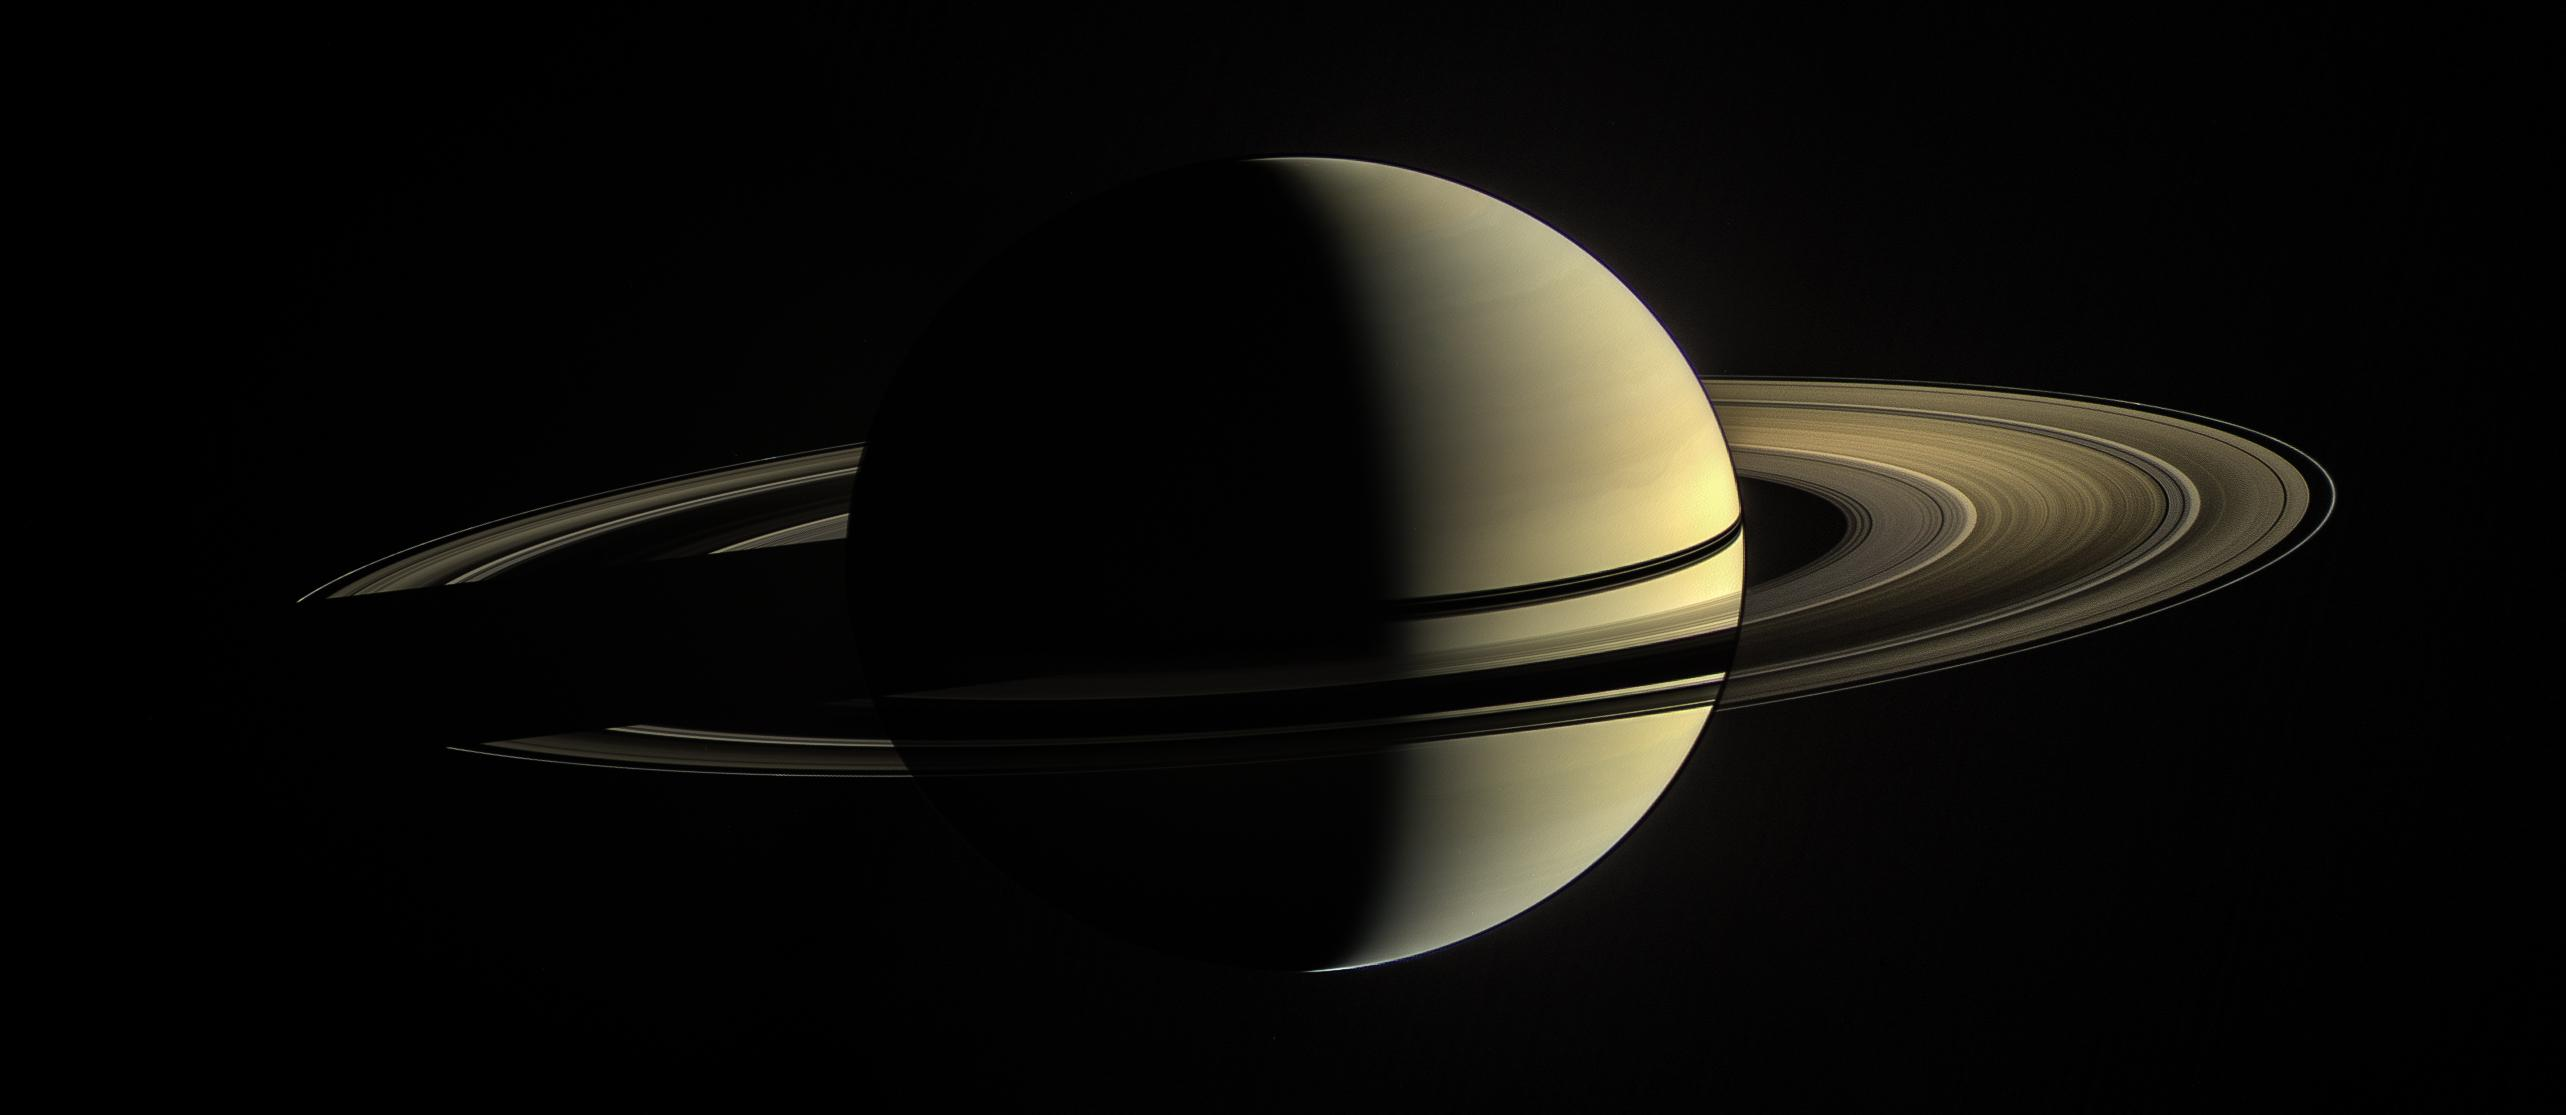

In [ ]:
import PIL.Image

img = PIL.Image.open('saturn_image.jpg')
img

In [ ]:
new_size = (200, 200)
img = img.resize(new_size)

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)
Markdown(response.text)

 Saturn is the sixth planet from the Sun and the second-largest in the Solar System, after Jupiter. It is a gas giant with a mass about 95 times that of Earth. Saturn is best known for its seven rings, which are made up of billions of small particles. The rings are very thin, and they extend for thousands of kilometers from the planet. Saturn also has a number of moons, the largest of which is Titan. Titan is larger than Mercury and has a thick atmosphere. Saturn is a beautiful planet, and it is a popular destination for space probes. The Cassini-Huygens spacecraft spent 13 years studying Saturn and its moons, and it made a number of important discoveries.

In [ ]:
response = model.generate_content(["Give me the name of the planet and some movies that have featured this:", img], stream=True)
response.resolve()

In [ ]:
Markdown(response.text)

 The planet is Saturn. 

Movies that have featured Saturn include:

* 2001: A Space Odyssey (1968)
* Saturn 3 (1980)
* The Last Starfighter (1984)
* Star Trek: The Motion Picture (1979)
* Star Wars: Episode V - The Empire Strikes Back (1980)
* Star Wars: Episode VI - Return of the Jedi (1983)
* Armageddon (1998)
* Deep Impact (1998)
* The Core (2003)
* 2012 (2009)
* Interstellar (2014)
* The Martian (2015)
* Passengers (2016)
* Guardians of the Galaxy Vol. 
* 2 (2017)
* Ad Astra (2019)

## Submitting 2 images for comparisons

In [ ]:
img2 = PIL.Image.open('earth_image.jpg')

In [ ]:
# img2 = PIL.Image.open('neptune_image.jpg')

In [ ]:
new_size = (200, 200)
resized_img = img.resize(new_size)
resized_img2 = img2.resize(new_size)

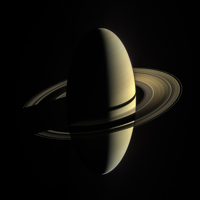

In [ ]:
resized_img

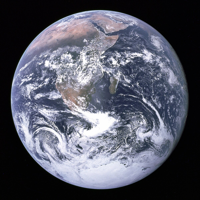

In [ ]:
resized_img2

In [ ]:
response = model.generate_content([ "Give me some of the differences between these 2 planets:",resized_img2,resized_img ], stream=True)
response.resolve()

In [ ]:
Markdown(response.text)

 The first image is of Earth, the third planet from the Sun, and the only astronomical object known to harbor life. The second image is of Saturn, the sixth planet from the Sun and the second-largest in the Solar System, after Jupiter. 

Saturn is a gas giant with a mass about 95 times that of Earth. It is composed mostly of hydrogen and helium, with traces of other elements. Saturn's most distinctive feature is its prominent ring system, which is made up of billions of small particles of ice and rock. 

Earth is a terrestrial planet with a mass about 5.972 times that of the Moon. It is composed mostly of iron, oxygen, silicon, and magnesium. Earth's atmosphere is composed mostly of nitrogen and oxygen, with traces of other gases. Earth's surface is covered by water, land, and ice.

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Source: This notebook is modified from an original Notebook from author Sam Witteveen. Associated YouTube video at [link](https://www.youtube.com/watch?v=HN96QDFBD0g)